# Frequency Analysis of EEG Signals

https://physionet.org/content/mssvepdb/1.0.0/

Description of Experiment

Experiment 1

Subjects were exposed to non-overlapping flickering lights from five magenta boxes with frequencies [6.66Hz, 7.5Hz, 8.57Hz 10Hz and 12Hz]. 256 channel EEG recordings were captured.

Each session of the experimental procedure consisted of the following:

100 seconds of rest.
An adaptation period in which the subject is exposed to eight 5 second windows of flickering from a magenta box. Each flickering window is of a single isolated frequency, randomly chosen from the above set, specified in the FREQUENCIES1.txt file under 'adaptation'. The individual flickering windows are separated by 5 seconds of rest.
30 seconds of rest.
For each of the frequencies from the above set in ascending order, also specified in FREQUENCIES1.txt under 'main trials':
Three 5 second windows of flickering at the chosen frequency, separated by 5 seconds of rest.
30 seconds of rest.
This gives a total of 15 flickering windows, or 23 including the adaptation period.
The order of chosen frequencies is the same for each session, although there are small-moderate variations in the actual frequencies of each individual window. The .freq annotations list the different frequencies at a higher level of precision.

 

*Note: Each 'session' in experiment 1 includes an adaptation period, unlike experiment 2 and 3 where each subject undergoes only one adaptation period before their first 'session'.

In [3]:
# Upload Packages ------------------------------------------------------------------------------------------------------------

# General Packages
import numpy as np # a package with many useful mathmatical functions
import matplotlib.pyplot as plt # a package necessary for plotting
import scipy.io as sio # a package which allows us to upload .mat files or files from MATLAB
import os
from scipy import signal
from scipy.fft import fft
import pandas as pd
import io

# Physionet Packages
import wfdb # enables reading of data

# Frequency Analysis Package
import multitaper_spectrogram_python as multitaper_spectrogram

# Enable Interactive Jupyter Scripts
%matplotlib notebook

#----------------------------------------------------------------------------------------------------------------------------------
#
# General Set Up
#
#----------------------------------------------------------------------------------------------------------------------------------

# Download Data ------------------------------------------------------------------------------------------------------------

# Where am I currently in my files
cwd = os.getcwd()
print(cwd)

# Change to where the data is
os.chdir('/Users/tbaum/Documents/mamem-ssvep-database-1.0.0/dataset1')
os.getcwd()

/Users/tbaum/Documents/mamem-ssvep-database-1.0.0/dataset1


'/Users/tbaum/Documents/mamem-ssvep-database-1.0.0/dataset1'

In [4]:
experiment = 'S001a'

flash = experiment + '.flash'

print(flash)
win = pd.read_csv(flash, encoding = 'ISO-8859-1')
print(win)

file open

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

print(win)

S001a.flash
    Unnamed: 0
0         ü 
1         ü 
2         ü 
3         ü 
4         ü 
..         ...
178       ü 
179       ü 
180       ü 
181       ü 
182       ü 

[183 rows x 1 columns]
    Unnamed: 0
0    ü      
1    ü      
2    ü      
3    ü      
4    ü      
5    ü      
6    ü      
7    ü      
8    ü      
9    ü      
10   ü      
11   ü      
12   ü      
13   ü      
14   ü      
15   ü      
16   ü      
17   ü      
18   ü      
19   ü      
20   ü      
21   ü      
22   ü      
23   ü      
24   ü      
25   ü      
26   ü      
27   ü      
28   ü      
29   ü      
30   ü      
31   ü      
32   ü      
33   ü      
34   ü      
35   ü      
36   ü      
37   ü      
38   ü      
39   ü      
40   ü      
41   ü      
42   ü      
43   ü      
44   ü      
45   ü      
46   ü      
47   ü      
48   ü      
49   ü      
50   ü      
51  

<ipython-input-4-1b64ecb1b398>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [35]:
import chardet

experiment = 'S001a'
flash = experiment + '.flash'

file = open(flash, 'r', encoding = None)
array = file.read()
# chardet.detect(array)
print(array)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 3: invalid start byte

In [36]:
f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 3: invalid start byte

In [37]:
# Choice of Experiment
experiment = 'S001a'

# flash = experiment + '.flash'
# pd.read_csv(flash)

# Read a WFDB header file only (without the signals)
record = wfdb.rdheader(experiment)
print(record.__dict__)

record = wfdb.rdrecord(experiment, physical = True)

{'record_name': 'S001a', 'n_sig': 256, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 117917, 'base_time': None, 'base_date': None, 'comments': ['Gender: Male', 'Age: 24', 'Handedness: Right', 'Hairtype: Regular'], 'sig_name': ['EEG', 'F8', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'FP2', 'EEG', 'EEG', 'Fz', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'NAS', 'EEG', 'EEG', 'EEG', 'EEG', 'F3', 'Fp1', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'F7', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'T7', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'LM', 'EEG', 'P7', 'EEG', 'EEG', 'EEG', 'EEG', 'Pz', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG'

In [23]:
signals = record.p_signal
# signals.shape # time X channels

fs = record.fs

# plt.plot(record.p_signal[1, :])
# signals.shape[0]/fs

In [24]:
sig_name = 'O1'
channel = record.sig_name.index(sig_name) # find which channel is the channel we want
O1 = record.p_signal[:, channel] # isolate data

sig_name = 'O2'
channel = record.sig_name.index(sig_name) # find which channel is the channel we want
O2 = record.p_signal[:, channel] # isolate data

sig_name = 'Oz'
channel = record.sig_name.index(sig_name) # find which channel is the channel we want
Oz = record.p_signal[:, channel] # isolate data

Multitaper Spectrogram Properties: 
     Spectral Resolution: 2.0Hz
     Window Length: 5.0s
     Window Step: 1.0s
     Time Half-Bandwidth Product: 5
     Number of Tapers: 9
     Frequency Range: 0-15Hz
     Detrend: linear


 Multitaper compute time: 0.8386427599999706 seconds


<IPython.core.display.Javascript object>


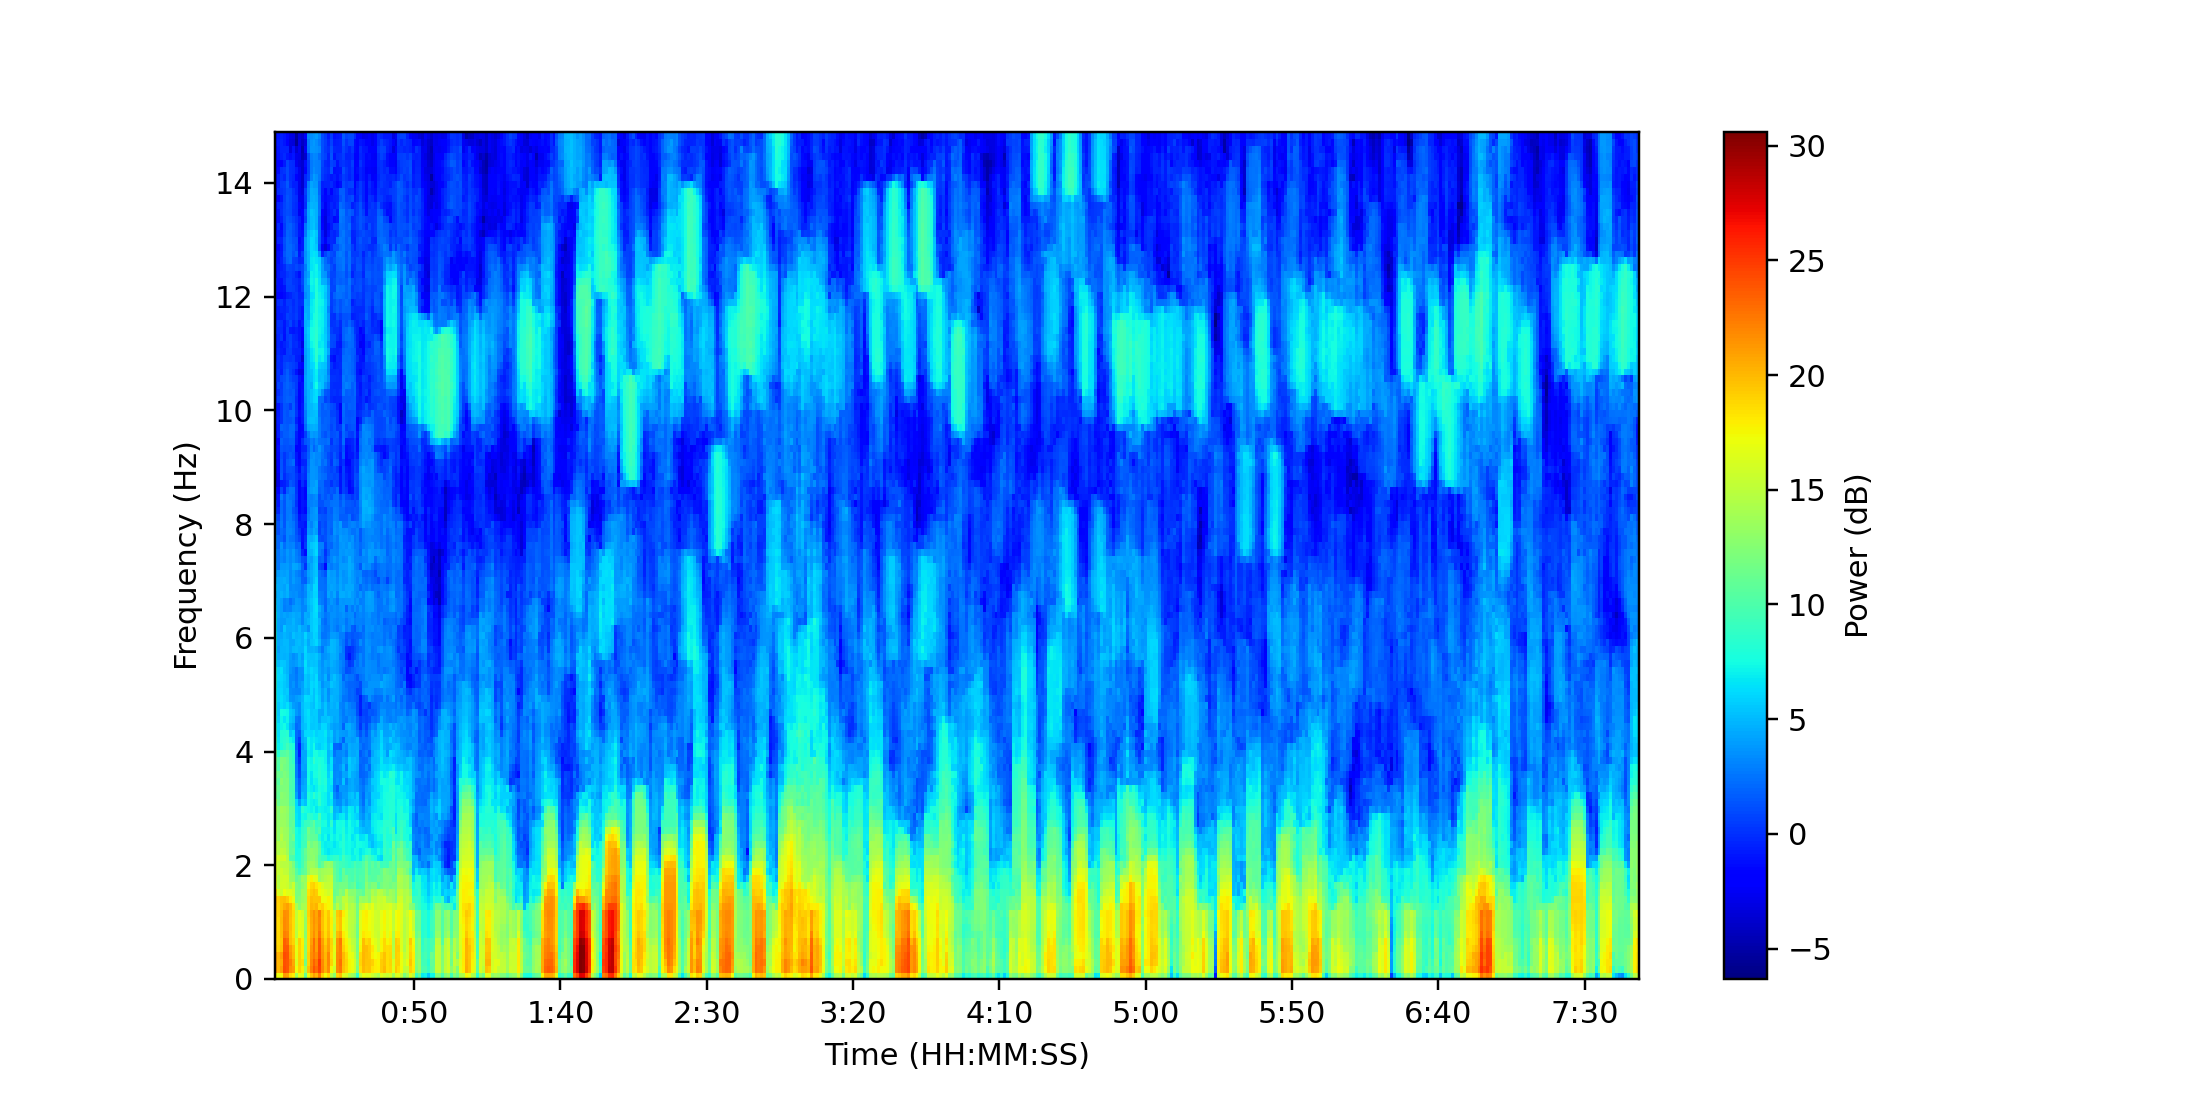

(array([[ 58.02241945,  50.23676487,  55.40528707, ...,  30.26077609,
          33.62321433,  13.98864735],
        [135.54769076, 102.42371385, 132.26420864, ...,  61.13170619,
          74.29078176,  27.95278192],
        [128.32815805, 102.91191872, 115.64671531, ...,  61.05272764,
          68.5273864 ,  31.39328046],
        ...,
        [  0.72582107,   0.82848287,   0.90425078, ...,   1.27266992,
           1.06687496,   0.91228754],
        [  0.70528669,   0.82188366,   0.86969045, ...,   1.14495709,
           0.97939583,   0.92922554],
        [  0.77286247,   0.83006228,   0.88239696, ...,   1.12534372,
           1.06083775,   0.6820339 ]]),
 array([  2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,
         11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
         20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,
         29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,
         38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44

In [25]:
multitaper_spectrogram.multitaper_spectrogram(O2, fs, frequency_range = [0, 15], clim_scale = False)

NameError: name 'pd' is not defined